In [2]:
from Bio import SeqIO
import pandas as pd

In [3]:
# Load dataset
fasta_file_path = "../dataset/1Jan2025_genomes.fa"
sequences = list(SeqIO.parse(fasta_file_path, "fasta"))

In [4]:
sequences[0]

SeqRecord(seq=Seq('TTTGGTGGAGCTGGCGGGAGTTGAACCCGCGTCCGAAATTCCTACATACCATTT...CAT'), id='AY319521', name='AY319521', description='AY319521 Salmonella phage SopEPhi, complete sequence.', dbxrefs=[])

In [6]:
seq_lengths = [len(str(seq.seq)) for seq in sequences]
summary = pd.Series(seq_lengths).describe()
summary

count     32043.000000
mean      60215.966607
std       55524.968903
min        1761.000000
25%       33532.500000
50%       44866.000000
75%       67557.500000
max      735411.000000
dtype: float64

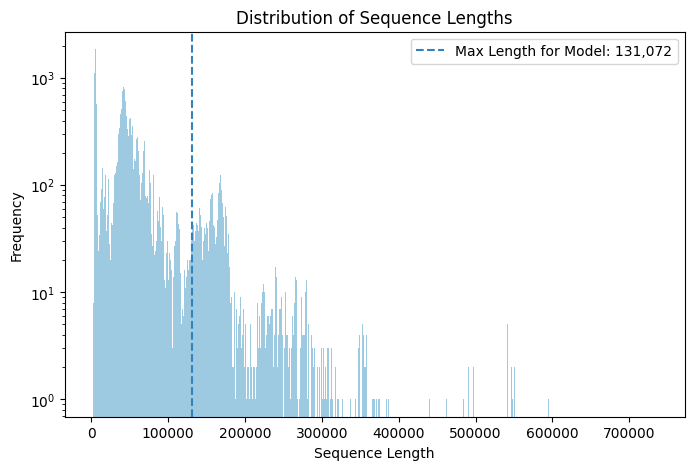

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(seq_lengths, color="#9ecae1", bins=1000)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.yscale("log")
# add a line for the model's expected max length: 131072
plt.axvline(x=131072, color="#3182bd", linestyle="--", label="Max Length for Model: 131,072")
plt.legend()
plt.show()

In [47]:
metadata = pd.read_csv("../dataset/data.tsv", sep="\t")

In [49]:
metadata.shape

(32043, 27)

In [48]:
metadata.head()

,Accession,Description,Classification,Genome Length (bp),Jumbophage,molGC (%),Molecule,Modification Date,Number CDS,Positive Strand (%),...,Sub-family,Family,Order,Class,Phylum,Kingdom,Realm,Baltimore Group,Genbank Division,Isolation Host (beware inconsistent and nonsense values)
0,AY319521,Salmonella phage SopEPhi,Salmonella phage SopEPhi Felsduovirus SopEphi ...,35155,False,51.321,DNA,22-MAR-2024,45,82.222222,...,Unclassified,Peduoviridae,Unclassified,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,SYN,Salmonella enterica subsp. enterica serovar Ty...
1,MW175890,Dompiswa phage TSP7_1,Dompiswa phage TSP7_1 Phapecoctavirus TSP7 Pha...,150892,False,39.115,DNA,10-JAN-2024,272,49.632353,...,Stephanstirmvirinae,Unclassified,Unclassified,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,ENV,Unspecified
2,GU339467,Mycobacterium phage RedRock,Mycobacterium phage RedRock Fromanvirus redroc...,53332,False,64.530,DNA,29-AUG-2023,90,40.000000,...,Unclassified,Unclassified,Unclassified,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,ENV,Unspecified
3,MF417929,Uncultured Caudovirales phage clone 2F_1,Uncultured Caudovirales phage clone 2F_1 Bracc...,32618,False,39.218,DNA,01-NOV-2022,42,16.666667,...,Unclassified,Peduoviridae,Caudovirales,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,ENV,Unspecified
4,MH616963,crAssphage sp. isolate ctbg_1,crAssphage sp. isolate ctbg_1 Whopevirus anima...,94878,False,28.507,DNA,25-OCT-2022,89,56.179775,...,Crudevirinae,Intestiviridae,Crassvirales,Caudoviricetes,Uroviricota,Heunggongvirae,Duplodnaviria,Group I,ENV,Unspecified


In [40]:
print(metadata.columns)

Index(['Accession', 'Description', 'Classification', 'Genome Length (bp)',
       'Jumbophage', 'molGC (%)', 'Molecule', 'Modification Date',
       'Number CDS', 'Positive Strand (%)', 'Negative Strand (%)',
       'Coding Capacity (%)', 'Low Coding Capacity Warning', 'tRNAs', 'Host',
       'Lowest Taxa', 'Genus', 'Sub-family', 'Family', 'Order', 'Class',
       'Phylum', 'Kingdom', 'Realm', 'Baltimore Group', 'Genbank Division',
       'Isolation Host (beware inconsistent and nonsense values)'],
      dtype='object')


In [50]:
metadata = metadata[["Accession", "Genus", "Family", "Host"]]

In [51]:
metadata.head()

,Accession,Genus,Family,Host
0,AY319521,Felsduovirus,Peduoviridae,Salmonella
1,MW175890,Phapecoctavirus,Unclassified,Dompiswa
2,GU339467,Fromanvirus,Unclassified,Mycobacterium
3,MF417929,Bracchivirus,Peduoviridae,Unspecified
4,MH616963,Whopevirus,Intestiviridae,Unspecified
